In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

import os

In [18]:
CWD = os.path.abspath('')

# Pruning  and Normalization

In [19]:
def get_data(ds_type: str) -> pd.DataFrame:
    """
    :param ds_type: train / test
    """
    path = Path(CWD).parent / f'data/{ds_type}.csv'
    
    return pd.read_csv(path)

In [20]:
df = get_data("train")

In [21]:
# Only keeping the columns with skill attributes, which are the most relevant for determining a player's position
columns_needed = ['pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_finishing',
                'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve',
                'skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed',
                'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina',
                'power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning',
                'mentality_vision','mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle',
                'defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning',
                'goalkeeping_reflexes','position']

# Rearranging the columns to have Attack positions first, then Defend positions, then Goalies
columns_needed_rearranged = ['attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing',
                            'attacking_volleys','shooting','passing','dribbling','skill_long_passing', # Attacking attributes
                            
                            'defending','defending_marking_awareness','defending_standing_tackle','defending_sliding_tackle', # Defence attributes
                
                            'physic','skill_dribbling','skill_curve','pace','skill_fk_accuracy','skill_ball_control','movement_acceleration','movement_sprint_speed',
                            'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina',
                            'power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning',
                            'mentality_vision','mentality_penalties','mentality_composure', # Mixed attributes
                
                            'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes',
                            'position'] # Goalie attributes

df = df[columns_needed_rearranged]
df.head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,shooting,passing,dribbling,skill_long_passing,defending,...,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position
0,64,40,56,65,41,52.0,60.0,70.0,58,67.0,...,53,48,58,66,14,11,12,12,12,LB
1,50,31,59,64,31,38.0,58.0,60.0,64,63.0,...,48,62,46,59,10,13,7,6,11,LDM
2,59,30,53,60,37,35.0,58.0,66.0,55,59.0,...,58,60,31,65,10,10,8,10,11,LWB
3,32,78,75,59,70,74.0,51.0,68.0,45,24.0,...,76,60,75,75,16,15,13,8,9,LS
4,64,38,49,63,46,53.0,59.0,53.0,55,61.0,...,60,52,52,58,12,5,11,12,15,LB


Assessing the best attributes for each position. Starting with a sample of Strikers (ST) with resampling of every 20 players:

Text(34, 100, 'Goalkeeper Attributes')

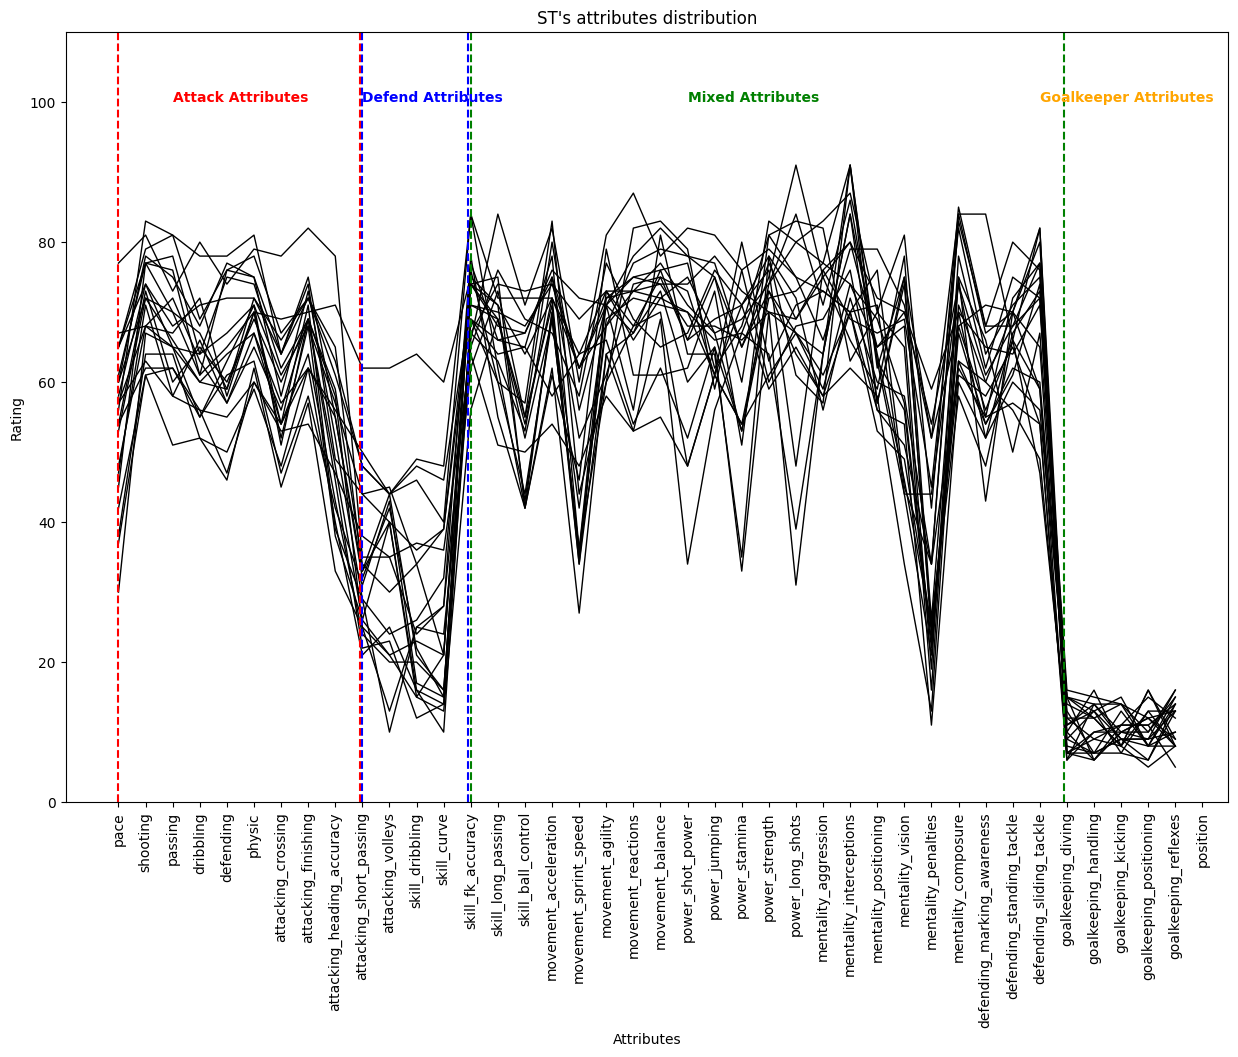

In [25]:
# Plotting the scores of all the available skills for a sample of Strikers (ST)

fig, ax = plt.subplots()
df_new_ST = df[df['position'] == 'ST'].iloc[::20,:-1]
df_new_ST.T.plot.line(color = 'black', figsize = (15,10), legend = False, ylim = (0, 110), title = "ST's attributes distribution", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Rating')

ax.set_xticks(np.arange(len(columns_needed)))
ax.set_xticklabels(labels = columns_needed, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(8.9, color='red', linestyle='--')

ax.axvline(9, color='blue', linestyle='--')
ax.axvline(12.9, color='blue', linestyle='--')

ax.axvline(13, color='green', linestyle='--')
ax.axvline(34.9, color='green', linestyle='--')

ax.text(2, 100, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(9, 100, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(21, 100, 'Mixed Attributes', color = 'green', weight = 'bold')
ax.text(34, 100, 'Goalkeeper Attributes', color = 'orange', weight = 'bold')

There is some heterogeneity and outliers in the data. It could be because some of the players have abnormally scores at attributes associated with their positions, so they create unevenness in the pattern. If we normalize the scores (while clustering by position), the heterogeneity should smoothen out while still preserving the trend.

Text(34, 0.045, 'Goalkeeper Attributes')

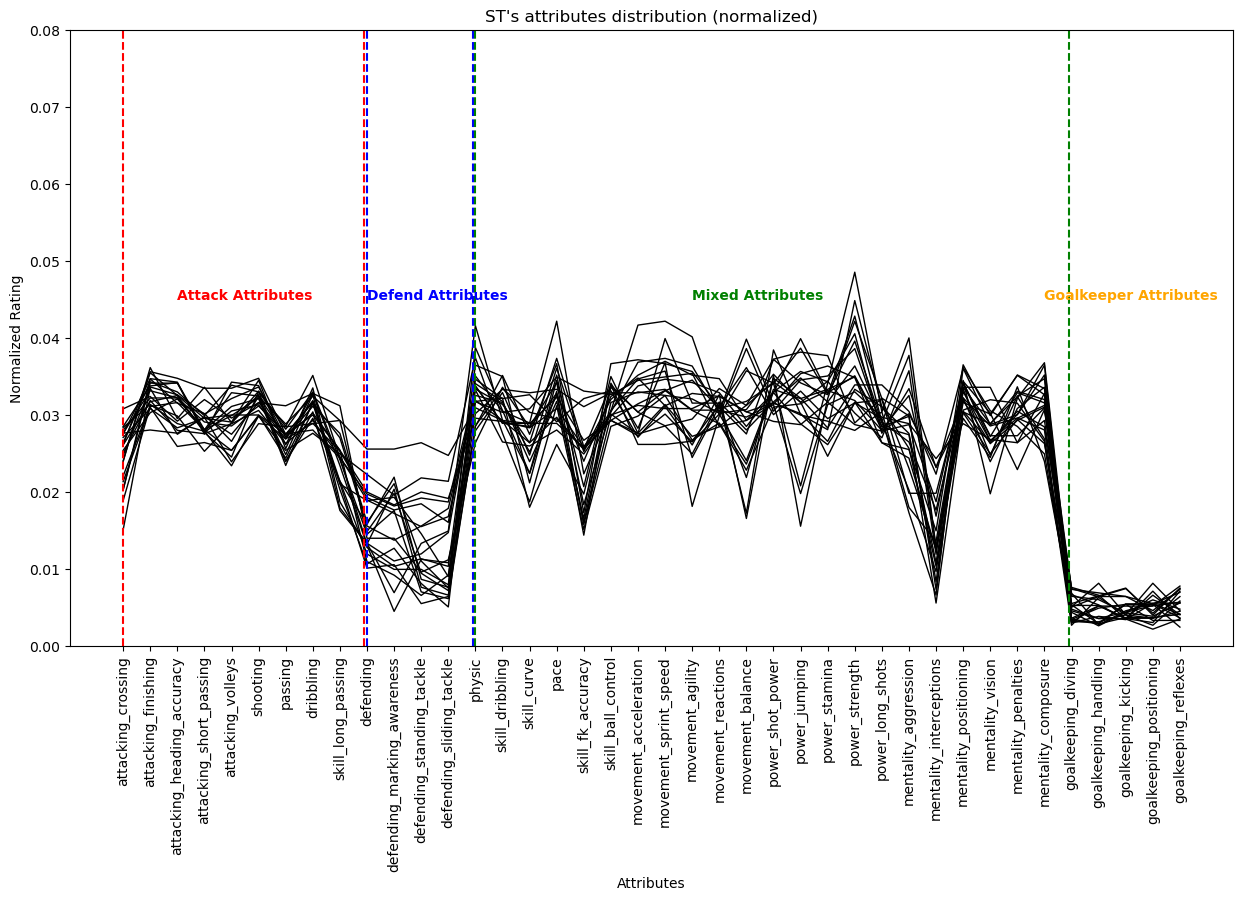

In [ ]:
df_new_ST_normalized = df_new_ST.div(df_new_ST.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(15, 8))
df_new_ST_normalized.T.plot.line(color = 'black', ylim = (0, 0.08), legend = False, title = "ST's attributes distribution (normalized)", ax=ax)
ax.set_xlabel('Attributes')
ax.set_ylabel('Normalized Rating')

ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(labels = cols, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(8.9, color='red', linestyle='--')

ax.axvline(9, color='blue', linestyle='--')
ax.axvline(12.9, color='blue', linestyle='--')

ax.axvline(13, color='green', linestyle='--')
ax.axvline(34.9, color='green', linestyle='--')

ax.text(2, 0.045, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(9, 0.045, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(21, 0.045, 'Mixed Attributes', color = 'green', weight = 'bold')
ax.text(34, 0.045, 'Goalkeeper Attributes', color = 'orange', weight = 'bold')

In [ ]:
# Normalize the whole dataset

last_column = df.iloc[:, -1] # Extract the last column (position)

df_new_normalized = df.iloc[:, :-1].div(df.iloc[:, :-1].sum(axis=1), axis=0) # Normalize the rest of the columns

df_new_normalized["position"] = last_column # Add the last column back

In [ ]:
df_new_normalized

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,shooting,passing,dribbling,skill_long_passing,defending,...,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position
0,0.027670,0.017294,0.024211,0.028102,0.017726,0.022482,0.025940,0.030264,0.025076,0.028967,...,0.022914,0.020752,0.025076,0.028534,0.006053,0.004756,0.005188,0.005188,0.005188,LB
1,0.024606,0.015256,0.029035,0.031496,0.015256,0.018701,0.028543,0.029528,0.031496,0.031004,...,0.023622,0.030512,0.022638,0.029035,0.004921,0.006398,0.003445,0.002953,0.005413,LDM
2,0.028311,0.014395,0.025432,0.028791,0.017754,0.016795,0.027831,0.031670,0.026392,0.028311,...,0.027831,0.028791,0.014875,0.031190,0.004798,0.004798,0.003839,0.004798,0.005278,LWB
3,0.015137,0.036897,0.035478,0.027909,0.033113,0.035005,0.024125,0.032167,0.021287,0.011353,...,0.035951,0.028382,0.035478,0.035478,0.007569,0.007096,0.006149,0.003784,0.004257,LS
4,0.029291,0.017391,0.022426,0.028833,0.021053,0.024256,0.027002,0.024256,0.025172,0.027918,...,0.027460,0.023799,0.023799,0.026545,0.005492,0.002288,0.005034,0.005492,0.006865,LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6890,0.028433,0.018240,0.028433,0.024678,0.016631,0.018777,0.023605,0.028970,0.024678,0.029506,...,0.025215,0.019313,0.026288,0.024142,0.006438,0.004828,0.005365,0.004292,0.006974,RCB
6891,0.023675,0.029329,0.030035,0.028975,0.026502,0.028622,0.027208,0.028622,0.026855,0.028269,...,0.029329,0.028975,0.025088,0.028622,0.005654,0.005654,0.003887,0.002120,0.002827,LCM
6892,0.030341,0.021913,0.024442,0.027391,0.020649,0.025706,0.028234,0.029920,0.026127,0.026970,...,0.026549,0.028234,0.023599,0.026127,0.003371,0.003793,0.002107,0.003371,0.004214,LWB
6893,0.031732,0.015413,0.033545,0.032185,0.019039,0.016772,0.028558,0.029465,0.030372,0.032638,...,0.019039,0.022212,0.017226,0.027199,0.003626,0.004533,0.004533,0.004533,0.003626,LCB


Text(34, 0.045, 'Goalkeeper Attributes')

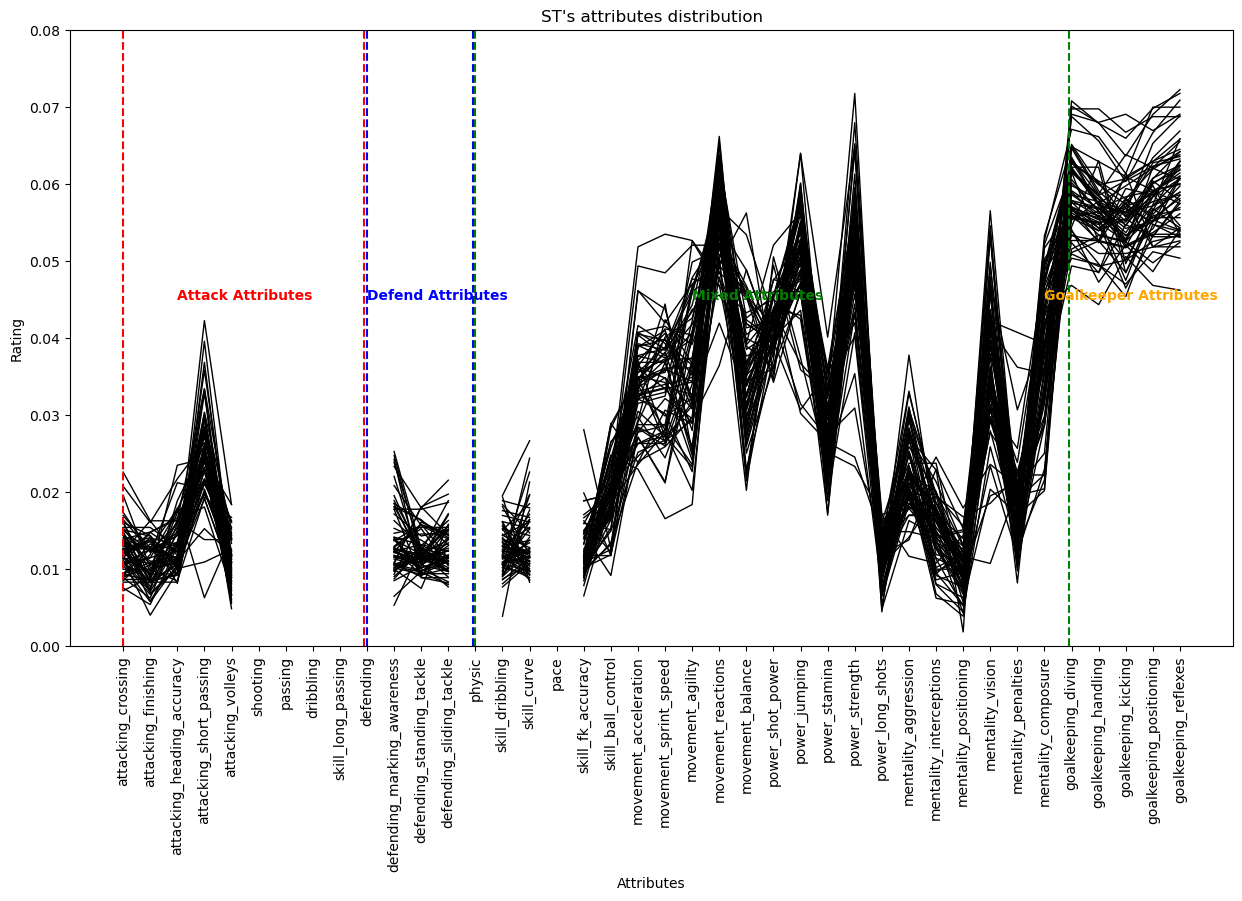

In [ ]:
# Plotting the scores of all the available skills for a sample of Goalies (GK)

fig, ax = plt.subplots()
df_new_GK = df_new_normalized[df_new_normalized['position'] == 'GK'].iloc[::10,:-1]
df_new_GK.T.plot.line(color = 'black', figsize = (15,8), legend = False, ylim = (0, 0.08), title = "GK's attributes distribution", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Rating')

ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(labels = cols, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(8.9, color='red', linestyle='--')

ax.axvline(9, color='blue', linestyle='--')
ax.axvline(12.9, color='blue', linestyle='--')

ax.axvline(13, color='green', linestyle='--')
ax.axvline(34.9, color='green', linestyle='--')

ax.text(2, 0.045, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(9, 0.045, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(21, 0.045, 'Mixed Attributes', color = 'green', weight = 'bold')
ax.text(34, 0.045, 'Goalkeeper Attributes', color = 'orange', weight = 'bold')

NameError: name 'df_new_normalized' is not defined

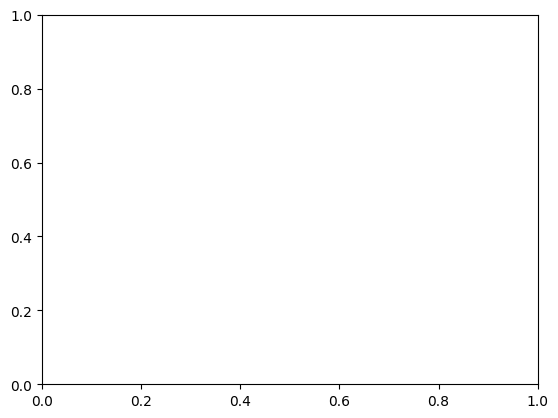

In [ ]:
# Plotting the scores of all the available skills for a sample of Right Striker (RS)

fig, ax = plt.subplots()
df_new_RS = df_new_normalized[df_new_normalized['position'] == 'GK'].iloc[::5,:-1]
df_new_RS.T.plot.line(color = 'black', figsize = (15,8), legend = False, ylim = (0, 0.08), title = "RS's attributes distribution", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Rating')

ax.set_xticks(np.arange(len(columns_needed)))
ax.set_xticklabels(labels = columns_needed, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(8.9, color='red', linestyle='--')

ax.axvline(9, color='blue', linestyle='--')
ax.axvline(12.9, color='blue', linestyle='--')

ax.axvline(13, color='green', linestyle='--')
ax.axvline(34.9, color='green', linestyle='--')

ax.text(2, 0.045, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(9, 0.045, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(21, 0.045, 'Mixed Attributes', color = 'green', weight = 'bold')
ax.text(34, 0.045, 'Goalkeeper Attributes', color = 'orange', weight = 'bold')

Text(34, 0.045, 'Goalkeeper Attributes')

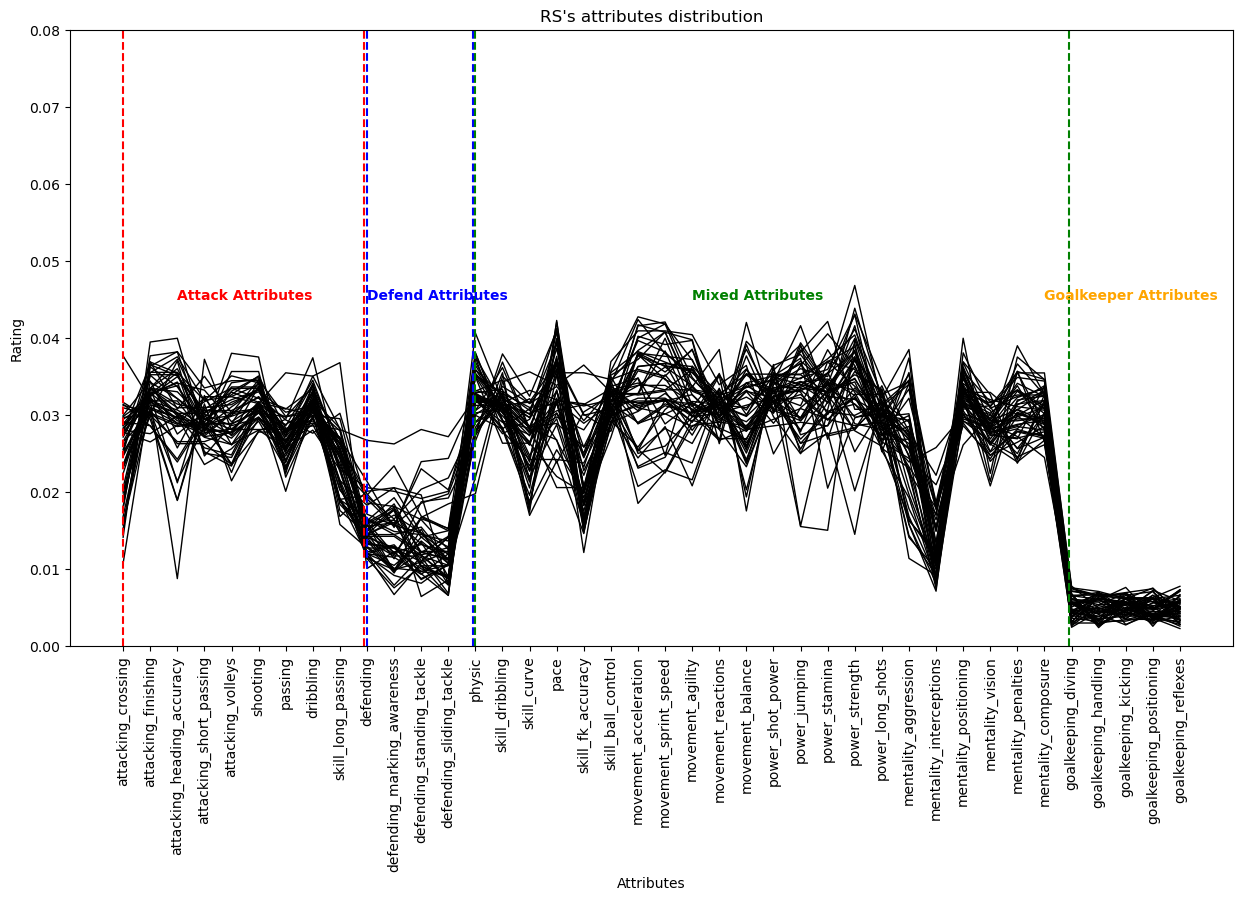

In [ ]:
# Plotting the scores of all the available skills for a sample of Left Striker (LS)

fig, ax = plt.subplots()
df_new_LS = df_new_normalized[df_new_normalized['position'] == 'LS'].iloc[::5,:-1]
df_new_LS.T.plot.line(color = 'black', figsize = (15,8), legend = False, ylim = (0, 0.08), title = "LS's attributes distribution", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Rating')

ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(labels = cols, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(8.9, color='red', linestyle='--')

ax.axvline(9, color='blue', linestyle='--')
ax.axvline(12.9, color='blue', linestyle='--')

ax.axvline(13, color='green', linestyle='--')
ax.axvline(34.9, color='green', linestyle='--')

ax.text(2, 0.045, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(9, 0.045, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(21, 0.045, 'Mixed Attributes', color = 'green', weight = 'bold')
ax.text(34, 0.045, 'Goalkeeper Attributes', color = 'orange', weight = 'bold')

Text(34, 0.045, 'Goalkeeper Attributes')

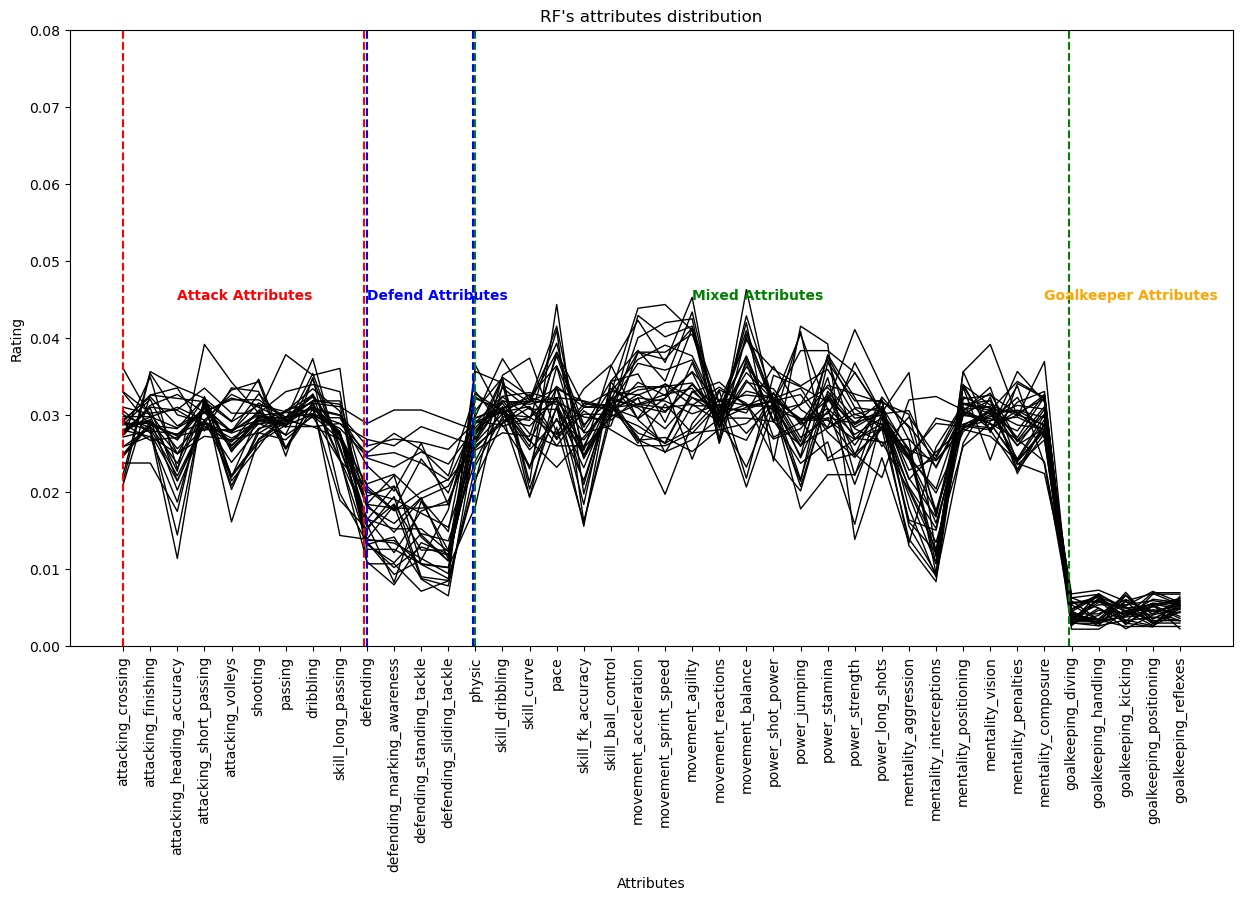

In [ ]:
# Plotting the scores of all the available skills for a sample of Right Forward (RF)

fig, ax = plt.subplots()
df_new_RF = df_new_normalized[df_new_normalized['position'] == 'RF'].iloc[::1,:-1]
df_new_RF.T.plot.line(color = 'black', figsize = (15,8), legend = False, ylim = (0, 0.08), title = "RF's attributes distribution", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Rating')

ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(labels = cols, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(8.9, color='red', linestyle='--')

ax.axvline(9, color='blue', linestyle='--')
ax.axvline(12.9, color='blue', linestyle='--')

ax.axvline(13, color='green', linestyle='--')
ax.axvline(34.9, color='green', linestyle='--')

ax.text(2, 0.045, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(9, 0.045, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(21, 0.045, 'Mixed Attributes', color = 'green', weight = 'bold')
ax.text(34, 0.045, 'Goalkeeper Attributes', color = 'orange', weight = 'bold')

Text(34, 0.045, 'Goalkeeper Attributes')

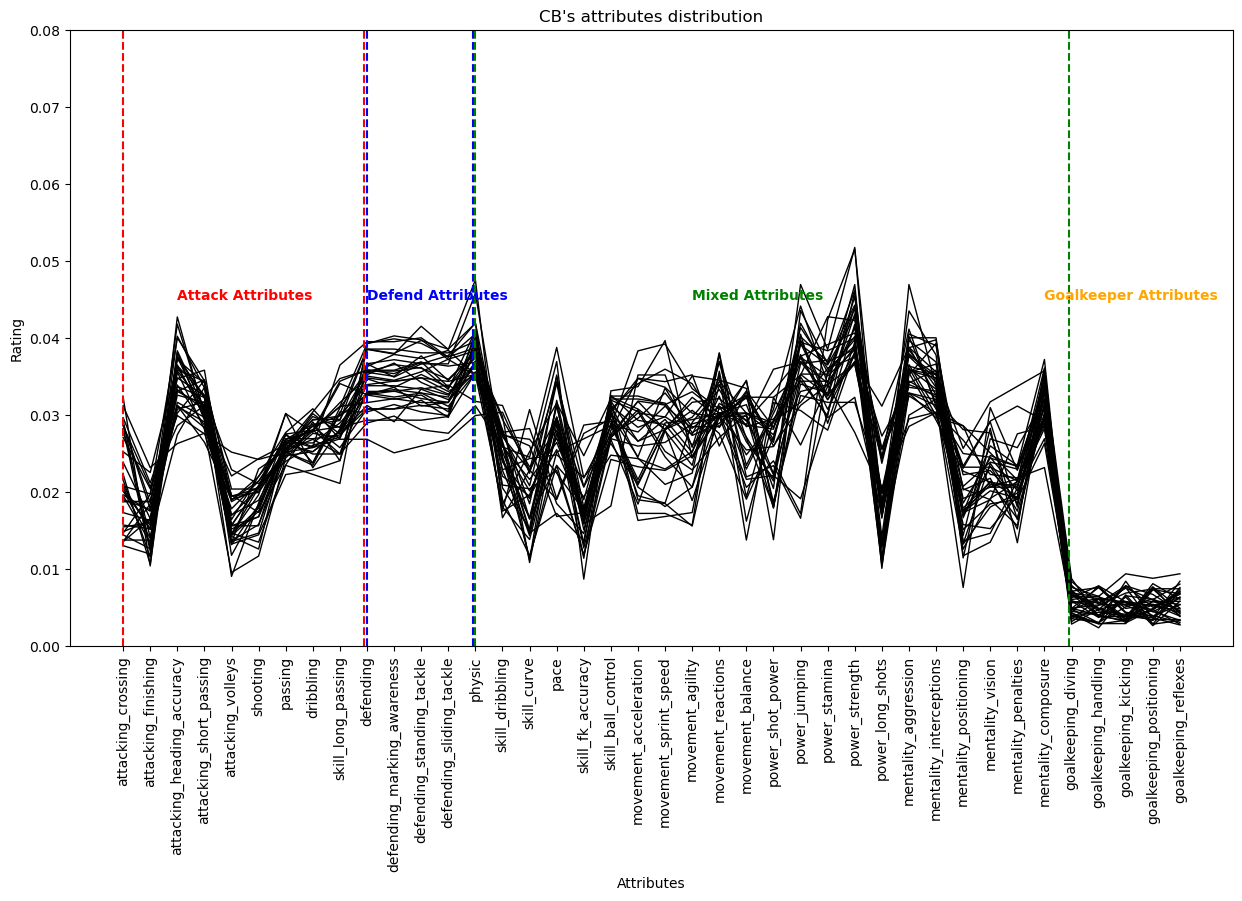

In [ ]:
# Plotting the scores of all the available skills for a sample of Center Back (CB)

fig, ax = plt.subplots()
df_new_CB = df_new_normalized[df_new_normalized['position'] == 'CB'].iloc[::5,:-1]
df_new_CB.T.plot.line(color = 'black', figsize = (15,8), legend = False, ylim = (0, 0.08), title = "CB's attributes distribution", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Rating')

ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(labels = cols, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(8.9, color='red', linestyle='--')

ax.axvline(9, color='blue', linestyle='--')
ax.axvline(12.9, color='blue', linestyle='--')

ax.axvline(13, color='green', linestyle='--')
ax.axvline(34.9, color='green', linestyle='--')

ax.text(2, 0.045, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(9, 0.045, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(21, 0.045, 'Mixed Attributes', color = 'green', weight = 'bold')
ax.text(34, 0.045, 'Goalkeeper Attributes', color = 'orange', weight = 'bold')

# Denis EDA

In [ ]:
def calculate_nan_values(data: pd.DataFrame) -> pd.DataFrame:
    nan_counts = data.isna().sum()
    nan_counts_percent = (data.isna().sum() / len(data)) * 100

    nan_summary = pd.DataFrame({
        'NaN Count': nan_counts,
        'NaN Percent': nan_counts_percent
    })

    nan_summary = nan_summary[nan_summary['NaN Count'] > 0]
    nan_summary = nan_summary.sort_values(by='NaN Count', ascending=False)

    return nan_summary


In [ ]:
def plot_nan_info(nan_info: pd.DataFrame, dataset_type: str) -> plt.Axes:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(nan_info.index, nan_info['NaN Percent'], color='coral', edgecolor='black')
    
    ax.set_xlabel('Columns', fontsize=14)
    ax.set_ylabel('NaN Percent (%)', fontsize=14)
    ax.set_title(f'Percentage of NaN Values for {dataset_type}', fontsize=16)
    ax.set_xticks(range(len(nan_info.index)))
    ax.set_xticklabels(nan_info.index, rotation=45, ha='right', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    return ax


In [ ]:
def preprocess_data(data: pd.DataFrame, dataset_type: str) -> pd.DataFrame:
    nan_summary_initial = calculate_nan_values(data)

    initial_lenght = len(data.columns)
    columns_to_drop = nan_summary_initial[nan_summary_initial["NaN Percent"] > 85].index
    data_cleaned = data.drop(columns=columns_to_drop)

    print(f'{len(columns_to_drop)} (from {initial_lenght} to {len(data_cleaned.columns)}) columns dropped from {dataset_type}')

    nan_summary_cleaned = calculate_nan_values(data_cleaned)

    fig, ax = plt.subplots(figsize=(12, 6))

    ax.bar(
        nan_summary_initial.index, 
        nan_summary_initial['NaN Percent'], 
        color='coral', 
        edgecolor='black', 
        label='Before Cleaning'
    )

    ax.bar(
        nan_summary_cleaned.index, 
        nan_summary_cleaned['NaN Percent'], 
        color='skyblue', 
        edgecolor='black', 
        label='After Cleaning'
    )

    ax.set_xlabel('Columns', fontsize=14)
    ax.set_ylabel('%', fontsize=14)
    ax.set_title(f'Comparison of NaN Values Drop', fontsize=16)
    ax.set_xticks(range(len(nan_summary_initial.index)))
    ax.set_xticklabels(nan_summary_initial.index, rotation=45, ha='right', fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    fig.text(0.5, 0.6, dataset_type, fontsize=40, color='gray', alpha=0.3, ha='center', va='center')   

    plt.tight_layout()
    plt.show()

    return data

4 (from 70 to 66) columns dropped from train


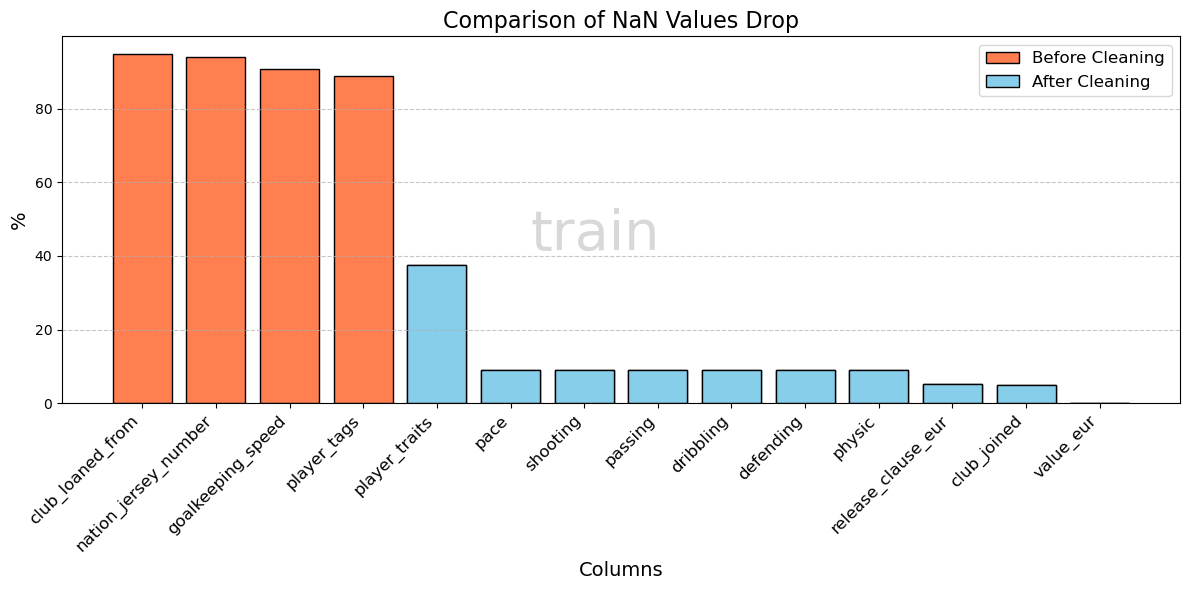

In [ ]:
train_data = get_data("train")

train_data = preprocess_data(data=train_data, dataset_type="train")


# Target column analysis

In [ ]:
def plot_dist(data: pd.DataFrame, column: str) -> None:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data[column], 
        kde=True,  
        color='coral', 
        bins=30
    )
    plt.title(f'Distribution of {column.capitalize()}', fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


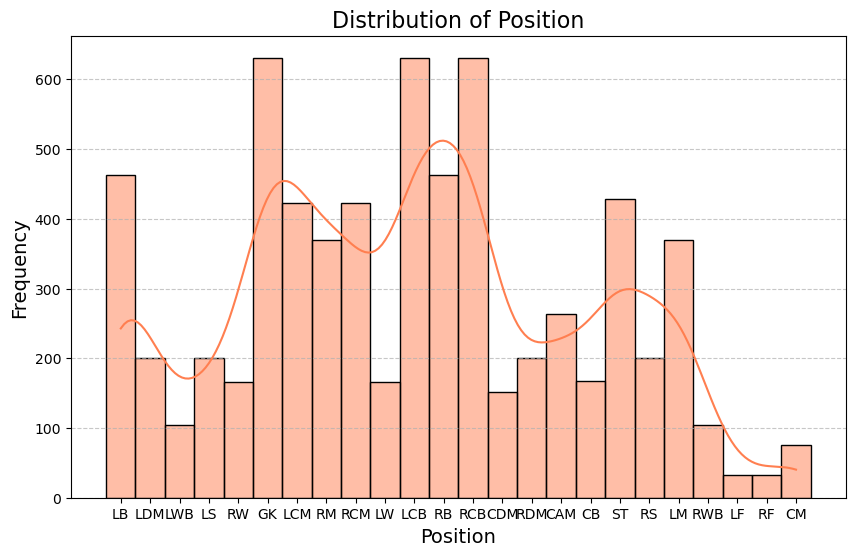

In [ ]:
plot_dist(train_data, "position")

# Categorical Analysis (Not implemented fully)

In [ ]:
for col in train_data.select_dtypes(include=['object', 'category']).columns:
    print(f'Categorical column {col} has {train_data[col].nunique()} unique values')

Categorical column short_name has 6692 unique values
Categorical column birthday_date has 3991 unique values
Categorical column club_name has 701 unique values
Categorical column league_name has 55 unique values
Categorical column club_loaned_from has 196 unique values
Categorical column club_joined has 1263 unique values
Categorical column nationality_name has 144 unique values
Categorical column preferred_foot has 2 unique values
Categorical column work_rate has 9 unique values
Categorical column body_type has 10 unique values
Categorical column real_face has 2 unique values
Categorical column player_tags has 61 unique values
Categorical column player_traits has 772 unique values
Categorical column position has 24 unique values


In [ ]:
def plot_categorical_dist(data: pd.DataFrame, n: int = 10) -> None:
    """
    Plots categorical parameters

    :param n: top n of unique values
    """
    categorical_columns = [
        col for col in data.select_dtypes(include=['object', 'category']).columns
    ]

    n_cols = 3
    n_rows = (len(categorical_columns) + n_cols - 1) // n_cols 

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
    axes = axes.flatten() 

    for i, col in enumerate(categorical_columns):
        top_categories = data[col].value_counts().head(10)

        sns.barplot(
            x=top_categories.index,
            y=top_categories.values,
            hue=top_categories.values,
            ax=axes[i],
            palette="coolwarm"
        )
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel('Category', fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(len(categorical_columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

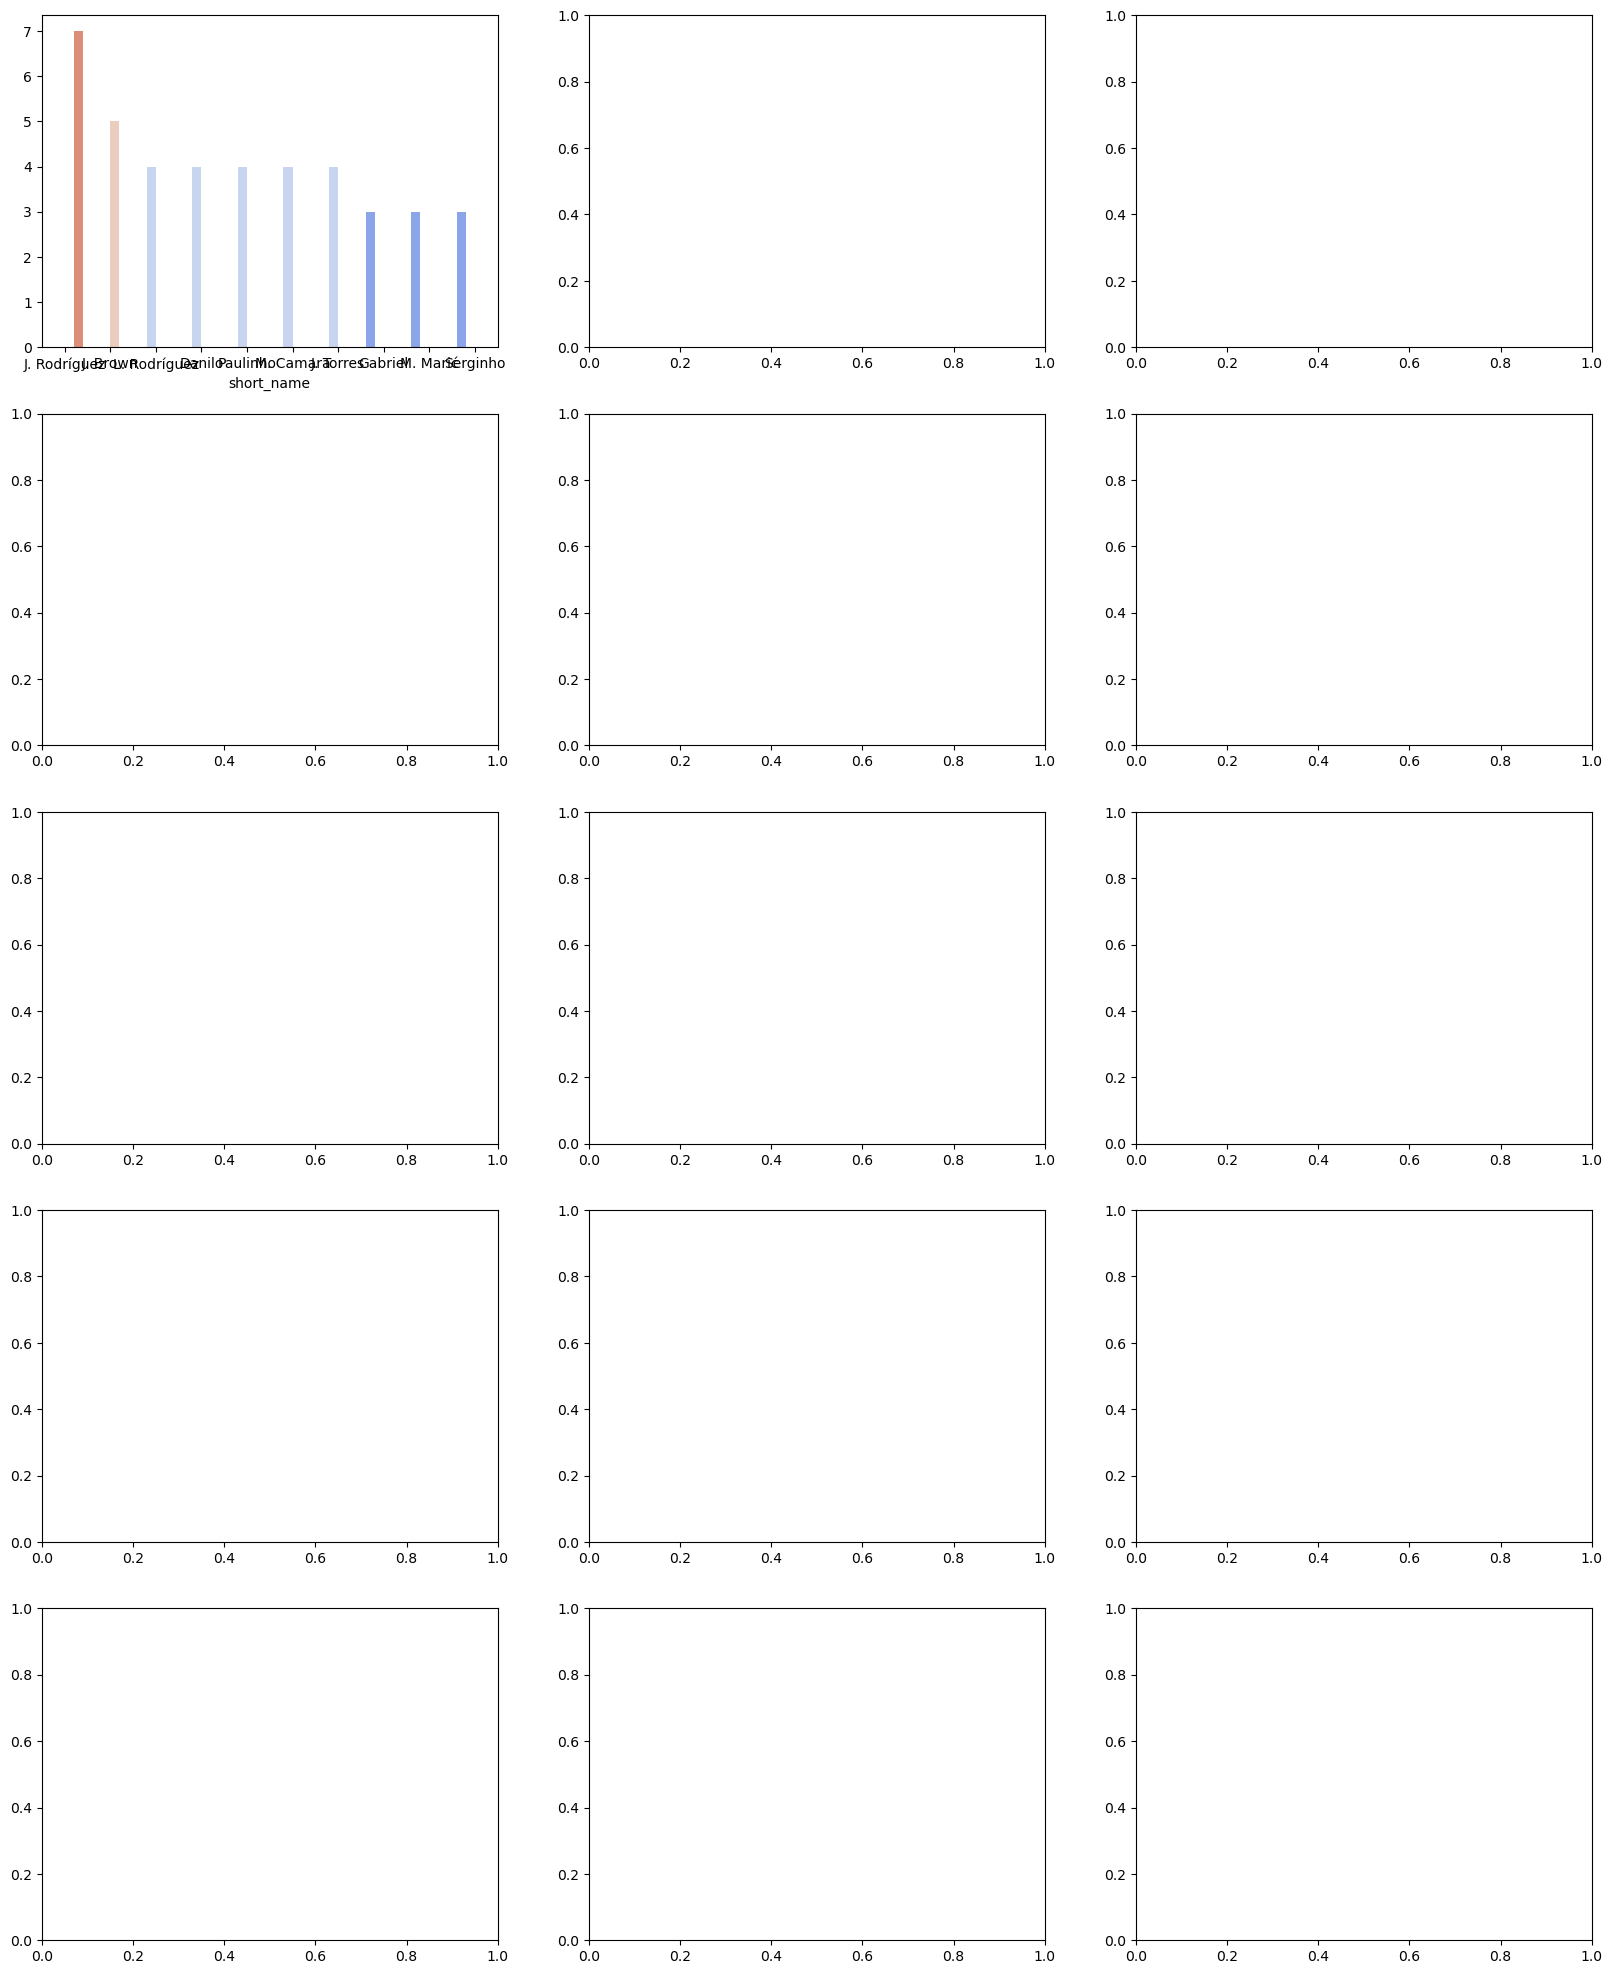

In [ ]:
plot_categorical_dist(data=train_data)

# Numerical Analysis

In [ ]:
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

train_data[numeric_columns].describe()

,id,overall,potential,value_eur,wage_eur,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,6895.000000,6895.000000,6895.000000,6.893000e+03,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,...,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,631.000000
mean,223463.552719,68.825671,72.031327,4.320388e+06,12034.126178,181.478898,75.527919,1.361856,16.442350,2022.754605,...,61.875997,51.281653,52.249021,49.736766,15.897317,15.690210,15.558666,15.819144,16.003046,40.220285
std,26876.952793,5.950459,6.070890,1.052554e+07,24630.820430,6.862683,7.041120,0.760018,15.440185,1.204310,...,10.937084,19.654312,20.898714,20.613351,17.451010,16.752522,16.316593,17.159677,17.854369,10.218593
min,41.000000,49.000000,53.000000,2.500000e+04,500.000000,156.000000,53.000000,1.000000,1.000000,2021.000000,...,12.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,207602.500000,65.000000,68.000000,7.250000e+05,2000.000000,177.000000,70.000000,1.000000,6.000000,2022.000000,...,56.000000,35.000000,34.000000,31.000000,8.000000,8.000000,8.000000,8.000000,8.000000,33.000000
50%,227951.000000,68.000000,72.000000,1.400000e+06,4000.000000,182.000000,75.000000,1.000000,13.000000,2023.000000,...,63.000000,58.000000,61.000000,58.000000,11.000000,11.000000,11.000000,11.000000,11.000000,41.000000
75%,242423.500000,72.000000,76.000000,2.900000e+06,12000.000000,186.000000,80.000000,1.000000,22.000000,2024.000000,...,69.000000,66.000000,68.000000,66.000000,14.000000,14.000000,14.000000,14.000000,14.000000,47.000000
max,264481.000000,93.000000,95.000000,1.940000e+08,350000.000000,203.000000,103.000000,5.000000,99.000000,2028.000000,...,96.000000,90.000000,93.000000,92.000000,91.000000,92.000000,91.000000,92.000000,90.000000,65.000000


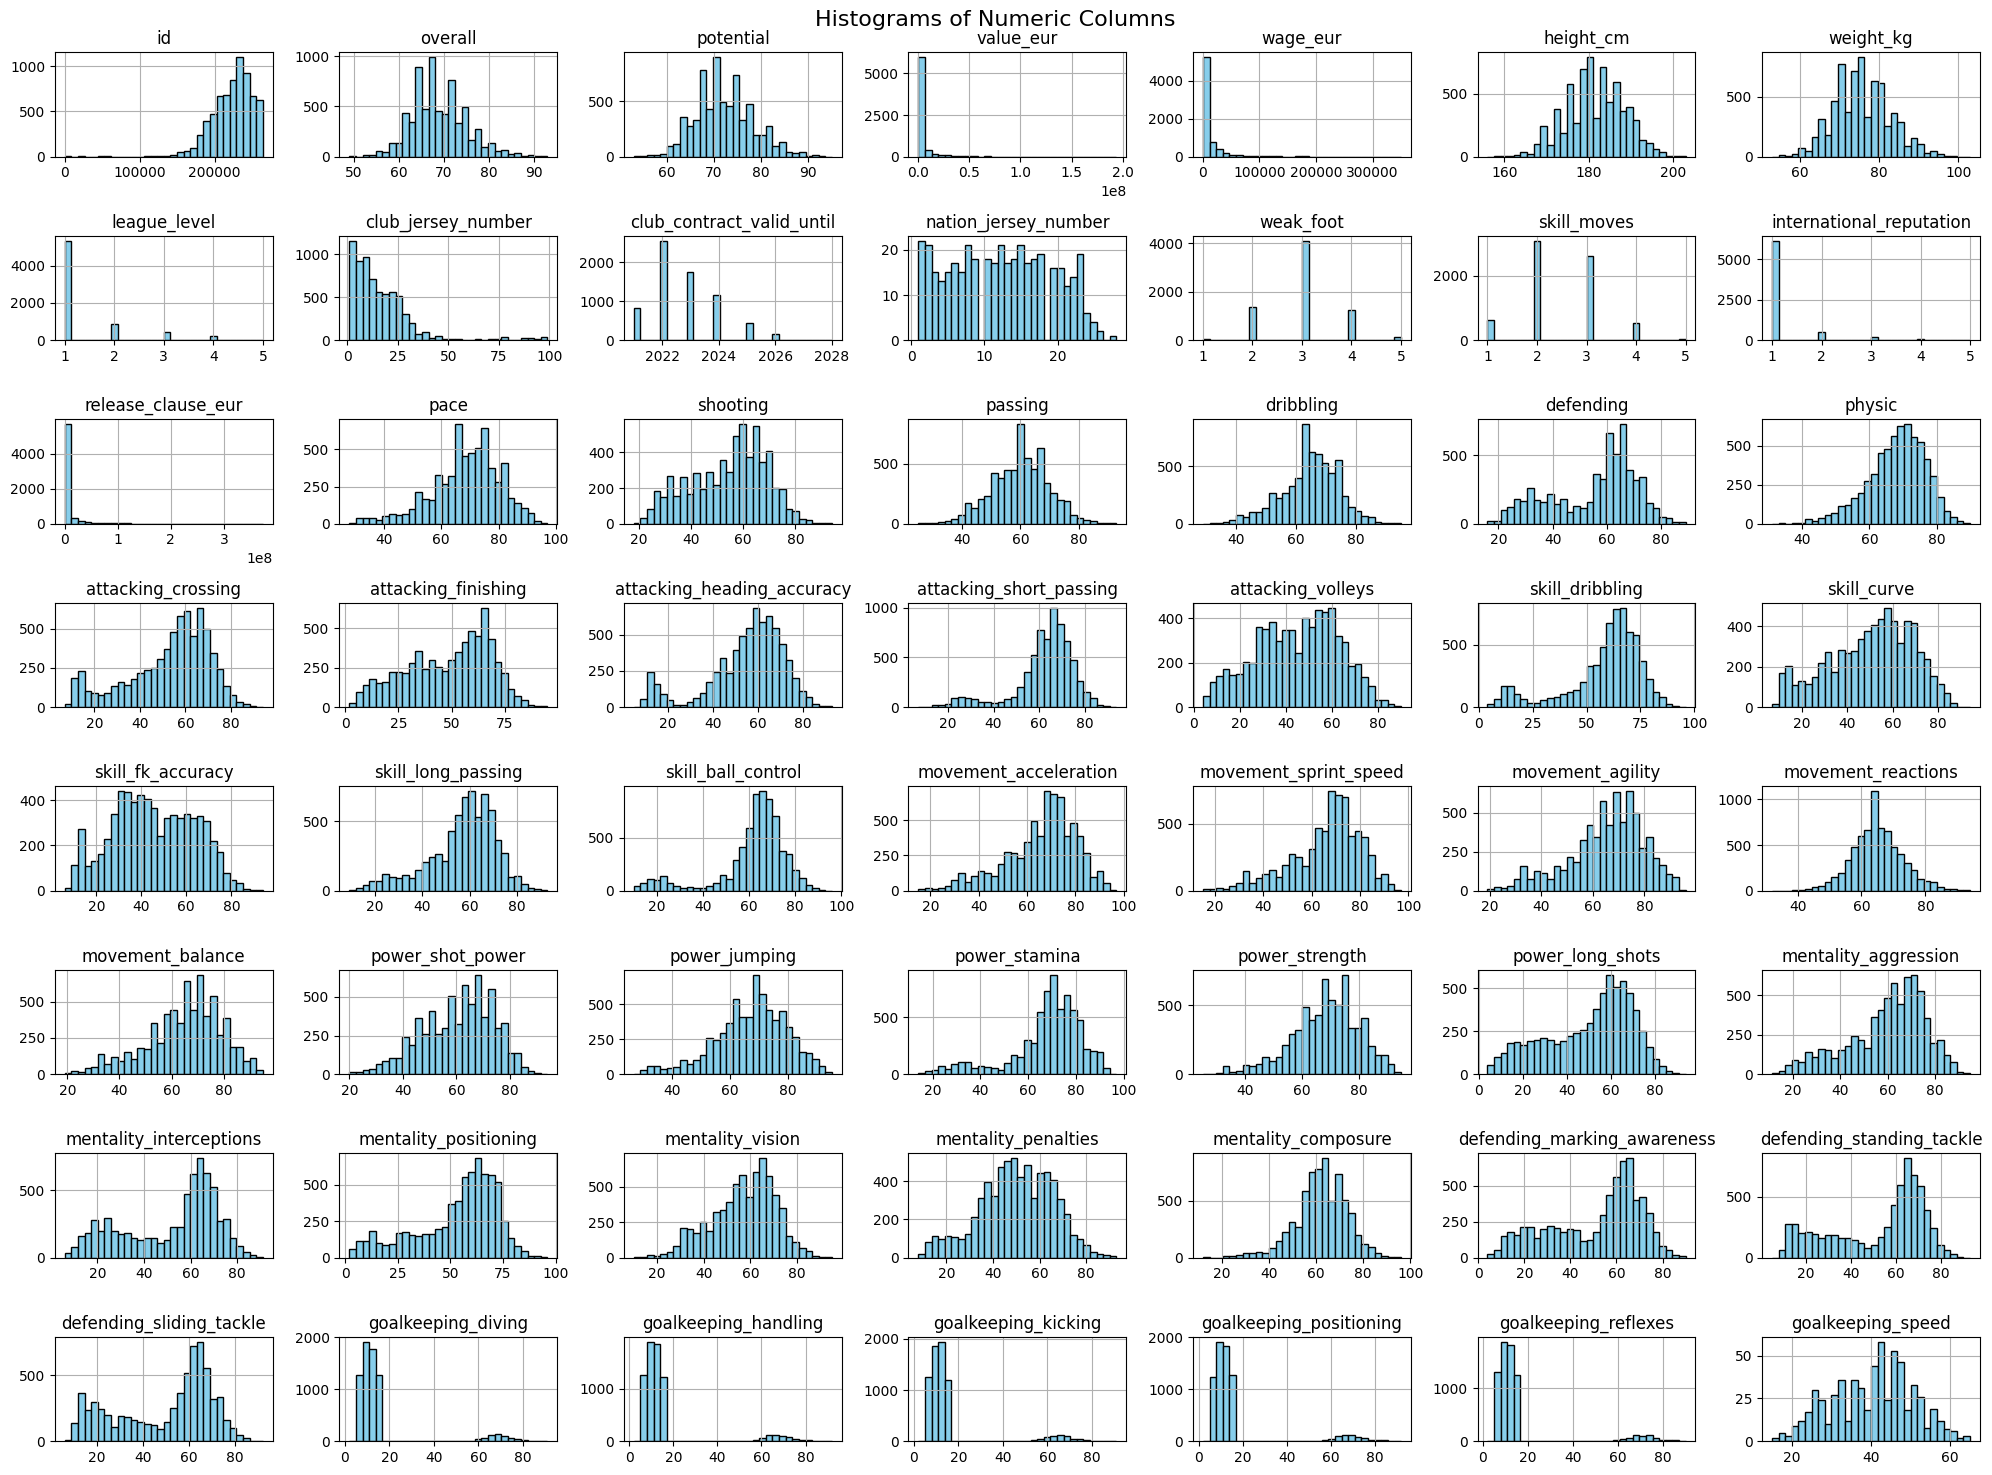

In [ ]:
train_data[numeric_columns].hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = train_data[numeric_columns].corr()

# Since we have a lot of variables, we need to extract only those, what have high correaltion
correlation_threshold = 0.9

correlated_pairs = []

for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if col != idx and abs(correlation_matrix.loc[idx, col]) > correlation_threshold:
            correlated_pairs.append((idx, col, correlation_matrix.loc[idx, col]))

correlated_pairs_df = pd.DataFrame(correlated_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
correlated_pairs_df = correlated_pairs_df.drop_duplicates()

print("Highly correlated pairs:")
print(correlated_pairs_df)


Highly correlated pairs:
                  Feature 1             Feature 2  Correlation
0        release_clause_eur             value_eur     0.995700
1                 value_eur    release_clause_eur     0.995700
2     movement_acceleration                  pace     0.962618
3     movement_sprint_speed                  pace     0.974853
4       attacking_finishing              shooting     0.968797
..                      ...                   ...          ...
61     goalkeeping_handling  goalkeeping_reflexes     0.971948
62      goalkeeping_kicking  goalkeeping_reflexes     0.967557
63  goalkeeping_positioning  goalkeeping_reflexes     0.972248
64    movement_acceleration     goalkeeping_speed     0.974757
65    movement_sprint_speed     goalkeeping_speed     0.940949

[66 rows x 3 columns]


### Converting categorical and strings to numerical:

In [ ]:
# Use "birthday_date" column (string) to create "age" column (int)
from datetime import datetime

def calculate_age_column(dob_column):
    """
    Calculates the exact age given a string date of birth.
    """
    current_date = datetime.now()
    
    # Convert string dates to datetime and calculate age
    ages = dob_column.apply(lambda dob: (
        current_date.year - datetime.strptime(dob, '%Y-%m-%d').year 
        - ((current_date.month, current_date.day) < (datetime.strptime(dob, '%Y-%m-%d').month, datetime.strptime(dob, '%Y-%m-%d').day))
    ))
    
    return ages

train_data["age"] = calculate_age_column(train_data["birthday_date"])

In [ ]:
# Encode "preferred_foot" column to 1-Right, 0-Left
def encode_preferred_foot(df, column_name="preferred_foot"):
    """
    Encodes the preferred foot column by replacing "Right" with 1 and "Left" with 0.
    """
    df[column_name] = df[column_name].replace({"Right": 1, "Left": 0})
    return df

encode_preferred_foot(train_data, "preferred_foot")

,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,club_name,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position
0,216302,E. García,71,71,1400000.0,10000,1989-12-28,176,73,Club Atlético de San Luis,...,65,66,65,14,11,12,12,12,NaN,LB
1,237867,D. Cancola,65,71,1000000.0,2000,1996-10-23,183,73,Ross County FC,...,65,61,58,10,13,7,6,11,NaN,LDM
2,253472,E. Kahl,65,77,1600000.0,2000,2001-09-27,178,69,Aarhus GF,...,60,58,59,10,10,8,10,11,NaN,LWB
3,223994,S. Mugoša,72,72,2300000.0,5000,1992-02-26,188,81,Incheon United FC,...,16,22,19,16,15,13,8,9,NaN,LS
4,251635,A. Țigănașu,65,65,525000.0,3000,1990-06-12,179,74,FC Botoşani,...,64,61,58,12,5,11,12,15,NaN,LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6890,242007,C. Whelan,59,66,425000.0,2000,1997-12-10,180,65,Carlisle United,...,52,57,58,12,9,10,8,13,NaN,RCB
6891,187961,Paulinho,83,83,28500000.0,61000,1988-07-25,183,80,Al Ahli,...,80,79,75,16,16,11,6,8,NaN,LCM
6892,257234,Y. Hamache,70,80,3400000.0,6000,1999-07-13,177,73,Boavista FC,...,62,67,68,8,9,5,8,10,NaN,LWB
6893,232511,S. Sasaki,71,71,1300000.0,7000,1989-10-02,176,70,Sanfrecce Hiroshima,...,72,72,70,8,10,10,10,8,NaN,LCB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6895 entries, 0 to 6894
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6895 non-null   int64  
 1   short_name                   6895 non-null   object 
 2   overall                      6895 non-null   int64  
 3   potential                    6895 non-null   int64  
 4   value_eur                    6893 non-null   float64
 5   wage_eur                     6895 non-null   int64  
 6   birthday_date                6895 non-null   object 
 7   height_cm                    6895 non-null   int64  
 8   weight_kg                    6895 non-null   int64  
 9   club_name                    6895 non-null   object 
 10  league_name                  6895 non-null   object 
 11  league_level                 6895 non-null   int64  
 12  club_jersey_number           6895 non-null   int64  
 13  club_loaned_from  

### Model-Specific Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:

# Label-encode "position"
def label_encode_column(df, column_name):
    """
    Label encode a categorical column in a DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column to encode.

    Returns:
    pd.DataFrame: The DataFrame with the encoded column.
    """
    le = LabelEncoder()
    df[column_name] = le.fit_transform(df[column_name])
    return df, le


df = train_data

df, label_encoder = label_encode_column(df, "position")

print(df)
print("Positions:", label_encoder.classes_)

          id   short_name  overall  potential   value_eur  wage_eur  \
0     216302    E. García       71         71   1400000.0     10000   
1     237867   D. Cancola       65         71   1000000.0      2000   
2     253472      E. Kahl       65         77   1600000.0      2000   
3     223994    S. Mugoša       72         72   2300000.0      5000   
4     251635  A. Țigănașu       65         65    525000.0      3000   
...      ...          ...      ...        ...         ...       ...   
6890  242007    C. Whelan       59         66    425000.0      2000   
6891  187961     Paulinho       83         83  28500000.0     61000   
6892  257234   Y. Hamache       70         80   3400000.0      6000   
6893  232511    S. Sasaki       71         71   1300000.0      7000   
6894  246750    S. Haudum       66         70   1100000.0      4000   

     birthday_date  height_cm  weight_kg                  club_name  ...  \
0       1989-12-28        176         73  Club Atlético de San Luis  ..

In [ ]:
# Drop all non-numerical columns
def drop_non_numerical_columns(df):
    """
    Drop all non-numerical columns from the DataFrame.

    """
    return df.select_dtypes(include=['number'])

df = train_data

# Keep only numerical columns
numerical_df = drop_non_numerical_columns(df)

numerical_df.head()

,id,overall,potential,value_eur,wage_eur,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position,age
0,216302,71,71,1400000.0,10000,176,73,1,29,2026,...,66,65,14,11,12,12,12,NaN,5,34
1,237867,65,71,1000000.0,2000,183,73,1,4,2022,...,61,58,10,13,7,6,11,NaN,8,28
2,253472,65,77,1600000.0,2000,178,69,1,19,2026,...,58,59,10,10,8,10,11,NaN,13,23
3,223994,72,72,2300000.0,5000,188,81,1,9,2023,...,22,19,16,15,13,8,9,NaN,11,32
4,251635,65,65,525000.0,3000,179,74,1,30,2022,...,61,58,12,5,11,12,15,NaN,5,34


In [ ]:
X = numerical_df.drop(["position"], axis=1)
y = numerical_df["position"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(importance_df.sort_values(by="Importance", ascending=False))

                        Feature  Importance
21           attacking_crossing    0.028594
19                    defending    0.028339
23   attacking_heading_accuracy    0.027983
16                     shooting    0.026510
15                         pace    0.026215
43        mentality_positioning    0.025464
49     defending_sliding_tackle    0.024204
48    defending_standing_tackle    0.022740
50           goalkeeping_diving    0.022386
42      mentality_interceptions    0.022205
22          attacking_finishing    0.022056
47  defending_marking_awareness    0.021925
17                      passing    0.021632
39               power_strength    0.021401
52          goalkeeping_kicking    0.021254
18                    dribbling    0.020825
5                     height_cm    0.020501
44             mentality_vision    0.020358
20                       physic    0.020103
29           skill_long_passing    0.019882
31        movement_acceleration    0.019470
26              skill_dribbling 